# Importing Libraries

In [1]:
#Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

# Loading data

In [2]:
#Loading the dataset
data=pd.read_csv(r'/kaggle/input/customer-personality-analysis/marketing_campaign.csv',sep="\t")

# Data Analysis & Processing

In [3]:
print(f'Total Number of datapoints: {len(data)}')
print(f'Shape of the dataset: {data.shape}')


Total Number of datapoints: 2240
Shape of the dataset: (2240, 29)


In [4]:
print('Quick view at the dataset:')

data.head(10).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

Quick view at the dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.000000,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.000000,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.000000,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.000000,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.000000,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [5]:
print('Information about the dataset:')

data.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDeal

In [6]:
print('Summary of the dataset:')

data.describe().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

Summary of the dataset:


,count,mean,std,min,25%,50%,75%,max
ID,2240.000000,5592.159821,3246.662198,0.000000,2828.250000,5458.500000,8427.750000,11191.000000
Year_Birth,2240.000000,1968.805804,11.984069,1893.000000,1959.000000,1970.000000,1977.000000,1996.000000
Income,2216.000000,52247.251354,25173.076661,1730.000000,35303.000000,51381.500000,68522.000000,666666.000000
Kidhome,2240.000000,0.444196,0.538398,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2240.000000,0.506250,0.544538,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2240.000000,49.109375,28.962453,0.000000,24.000000,49.000000,74.000000,99.000000
MntWines,2240.000000,303.935714,336.597393,0.000000,23.750000,173.500000,504.250000,1493.000000
MntFruits,2240.000000,26.302232,39.773434,0.000000,1.000000,8.000000,33.000000,199.000000
MntMeatProducts,2240.000000,166.950000,225.715373,0.000000,16.000000,67.000000,232.000000,1725.000000
MntFishProducts,2240.000000,37.525446,54.628979,0.000000,3.000000,12.000000,50.000000,259.000000


In [7]:
print('Null values in the dataset:')

data.isna().sum().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

Null values in the dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Insights**
- There are total 29 attributes in this dataset.
- Dt_Customer attribute which shows when customer enrolled is not parsed as datetime 
- There are 24 null values in only Income column which will be taken care in processing
- There are two categorical features a)Education and b) Marital_Status that are present in the dataset which we have to convert into numeric features by encoding them.

In [8]:
# removing data with misssing values

data.dropna(inplace=True)
print('Total number of datapoints after removing raws with missing values', len(data))

Total number of datapoints after removing raws with missing values 2216


In [9]:
# converting Dt_Customer column into datetime 

data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'])

In [10]:
#setting custom palette
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

In [11]:
print('Marital Status:')

data.Marital_Status.value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

Marital Status:


,Married,Together,Single,Divorced,Widow,Alone,Absurd,YOLO
Marital_Status,857,573,471,232,76,3,2,2


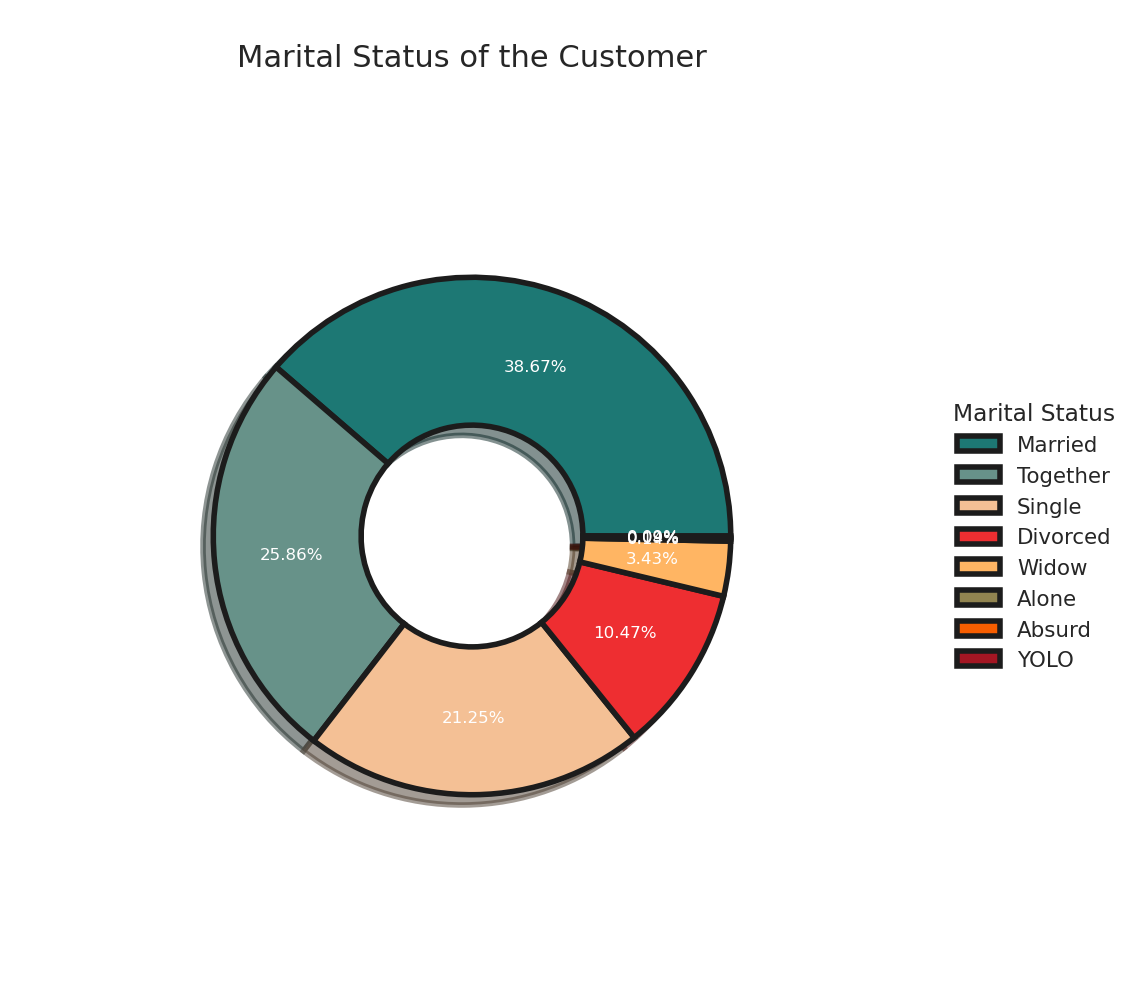

In [12]:
plt.subplots(figsize=(12, 12))

labels = 'Married', 'Together', 'Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'
size = 0.4

wedges, texts, autotexts = plt.pie([len(data[data['Marital_Status'] == 'Married']),
                                   len(data[data['Marital_Status'] == 'Together']),
                                   len(data[data['Marital_Status'] == 'Single']),
                                   len(data[data['Marital_Status'] == 'Divorced']),
                                   len(data[data['Marital_Status'] == 'Widow']),
                                   len(data[data['Marital_Status'] == 'Alone']),
                                   len(data[data['Marital_Status'] == 'Absurd']),
                                   len(data[data['Marital_Status'] == 'YOLO'])],
                                  explode=(0,0,0,0,0,0,0,0),
                                  textprops=dict(size=12, color='white'),
                                  autopct='%.2f%%',
                                  pctdistance=0.7,
                                  radius=0.7,
                                  colors=palette,
                                  shadow=True,
                                  wedgeprops=dict(width=size, edgecolor='#1c1c1c',
                                                  linewidth=4),
                                  startangle=0)

plt.legend(wedges, labels, title='Marital Status', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('\nMarital Status of the Customer', fontsize=22)
plt.show()


In [13]:
print('Education:')

data.Education.value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

Education:


,Graduation,PhD,Master,2n Cycle,Basic
Education,1116,481,365,200,54


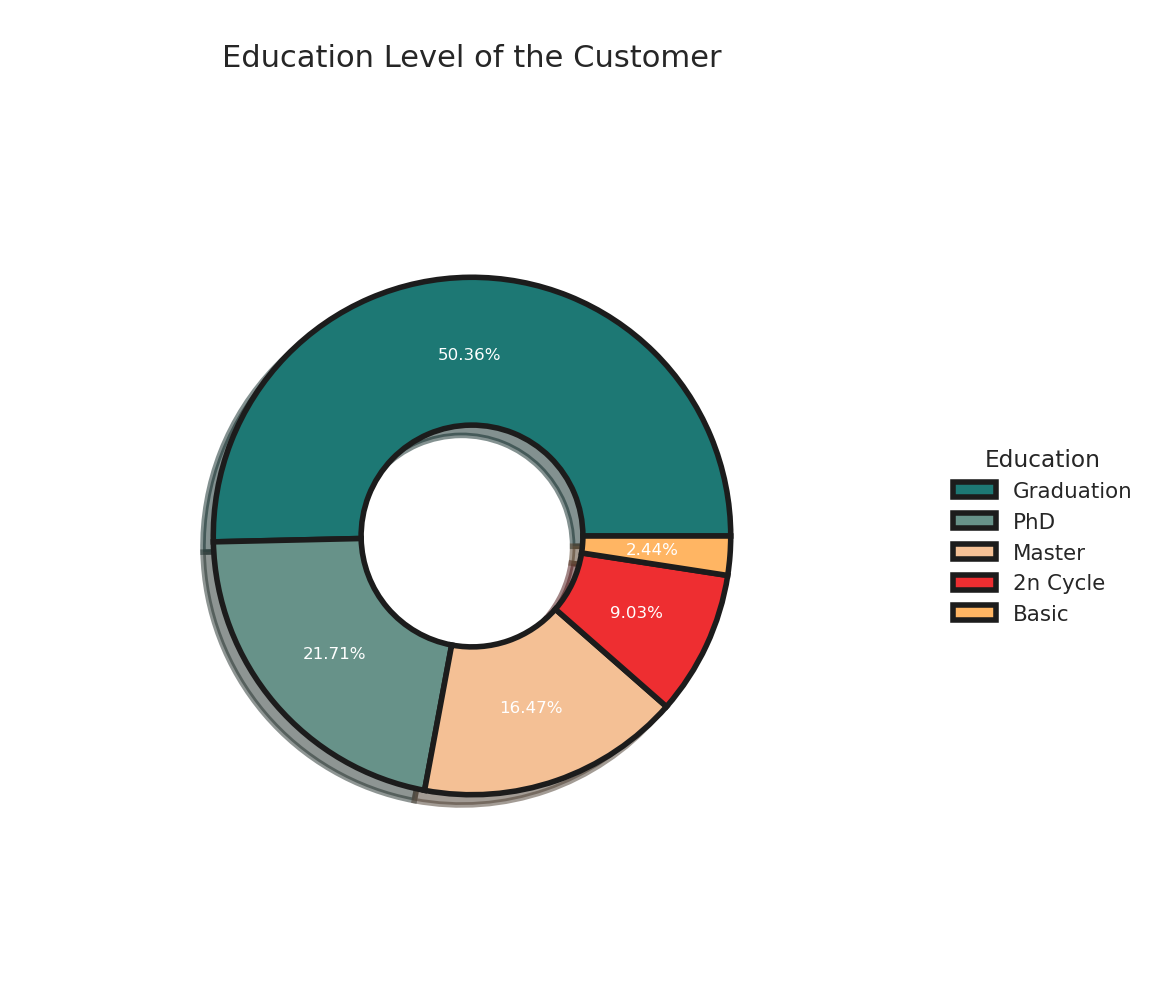

In [14]:
plt.subplots(figsize=(12, 12))

labels = 'Graduation', 'PhD', 'Master', '2n Cycle', 'Basic'
size = 0.4

wedges, texts, autotexts = plt.pie([len(data[data['Education'] == 'Graduation']),
                                   len(data[data['Education'] == 'PhD']),
                                   len(data[data['Education'] == 'Master']),
                                   len(data[data['Education'] == '2n Cycle']),
                                   len(data[data['Education'] == 'Basic'])],
                                  explode=(0,0,0,0,0),
                                  textprops=dict(size=12, color='white'),
                                  autopct='%.2f%%',
                                  pctdistance=0.7,
                                  radius=0.7,
                                  colors=palette,
                                  shadow=True,
                                  wedgeprops=dict(width=size, edgecolor='#1c1c1c',
                                                  linewidth=4),
                                  startangle=0)

plt.legend(wedges, labels, title='Education', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('\nEducation Level of the Customer', fontsize=22)
plt.show()


In [15]:
# Feature Engineering

# Age of customer today
data['Age']=2023-data['Year_Birth']

# Total spendings on different items
data['Spent']=data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
    
# Deriving Living attributes based on the marital status
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Single':'Alone', 'Divorced':'Alone',
                                                'Widow':'Alone', 'Absurd':'Alone', 'YOLO':'Alone'})

# Feature indicating Total childern in the household
data['Children']=data['Kidhome'] + data['Teenhome']

# Feature indicating Family size
data['Family_Size']=data['Living_With'].replace({'Partner':2,'Alone':1}) + data['Children']

# Renaming Education Categories for better understanding
data['Education']=data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate'})


# Renaming features for clearn understanding
data=data.rename(columns={'MntWines': 'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish',
                          'MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

# Dropping unneccessary featuers
to_drop=['Marital_Status','Dt_Customer','Z_CostContact','Z_Revenue','Year_Birth','ID']

data.drop(to_drop,inplace=True,axis=1)
                          

- Now that we have some new features, let's look at out dataset again 

In [16]:
data.head(20).style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size
0,Graduation,58138.000000,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66,1617,Alone,0,1
1,Graduation,46344.000000,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69,27,Alone,2,3
2,Graduation,71613.000000,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58,776,Partner,0,2
3,Graduation,26646.000000,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39,53,Partner,1,3
4,PhD,58293.000000,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42,422,Partner,1,3
5,Master,62513.000000,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,56,716,Partner,1,3
6,Graduation,55635.000000,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,52,590,Alone,1,2
7,PhD,33454.000000,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,38,169,Partner,1,3
8,PhD,30351.000000,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,49,46,Partner,1,3
9,PhD,5648.000000,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,73,49,Partner,2,4


In [17]:
data.describe().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

,count,mean,std,min,25%,50%,75%,max
Income,2216.000000,52247.251354,25173.076661,1730.000000,35303.000000,51381.500000,68522.000000,666666.000000
Kidhome,2216.000000,0.441787,0.536896,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2216.000000,0.505415,0.544181,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2216.000000,49.012635,28.948352,0.000000,24.000000,49.000000,74.000000,99.000000
Wines,2216.000000,305.091606,337.327920,0.000000,24.000000,174.500000,505.000000,1493.000000
Fruits,2216.000000,26.356047,39.793917,0.000000,2.000000,8.000000,33.000000,199.000000
Meat,2216.000000,166.995939,224.283273,0.000000,16.000000,68.000000,232.250000,1725.000000
Fish,2216.000000,37.637635,54.752082,0.000000,3.000000,12.000000,50.000000,259.000000
Sweets,2216.000000,27.028881,41.072046,0.000000,1.000000,8.000000,33.000000,262.000000
Gold,2216.000000,43.965253,51.815414,0.000000,9.000000,24.500000,56.000000,321.000000


- From above statistics, It seems like there are outliers in dataset that we need to remove.
- Plotting attributes is great method to understand the data in better manner.

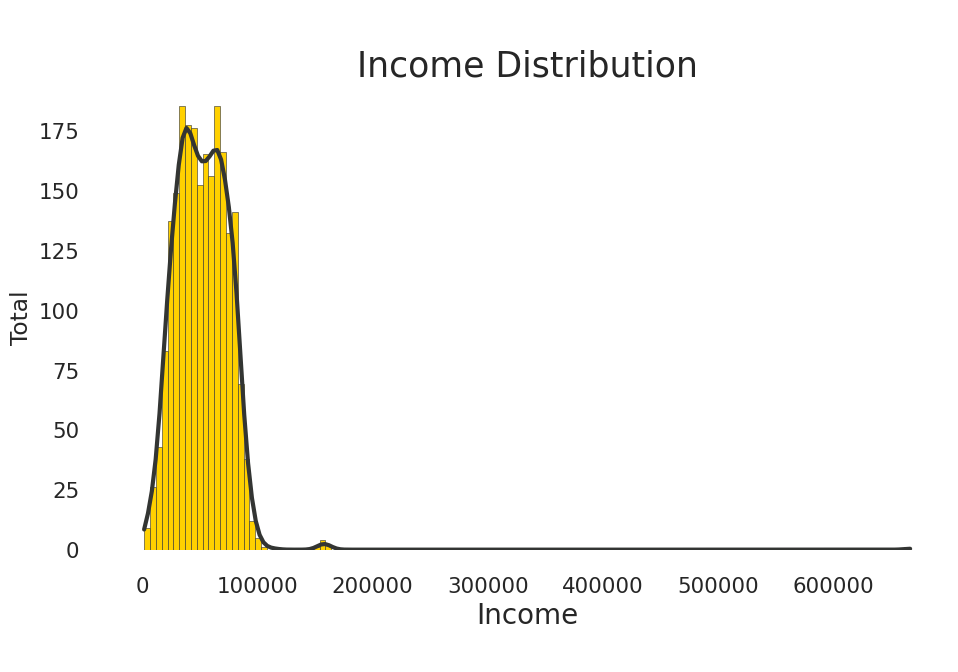

In [18]:
# Plotting Income attribute in Histogram

fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(data['Income'], color=palette[11], kde=True, bins='auto', alpha=1, fill=True, edgecolor=palette[12])
ax.lines[0].set_color(palette[12])
ax.set_title('\nIncome Distribution', fontsize=25)
ax.set_xlabel('Income\n', fontsize=20)
ax.set_ylabel('Total')


sns.despine(left=True, bottom=True)
plt.show()

- There seems to be outliers in Income attribute

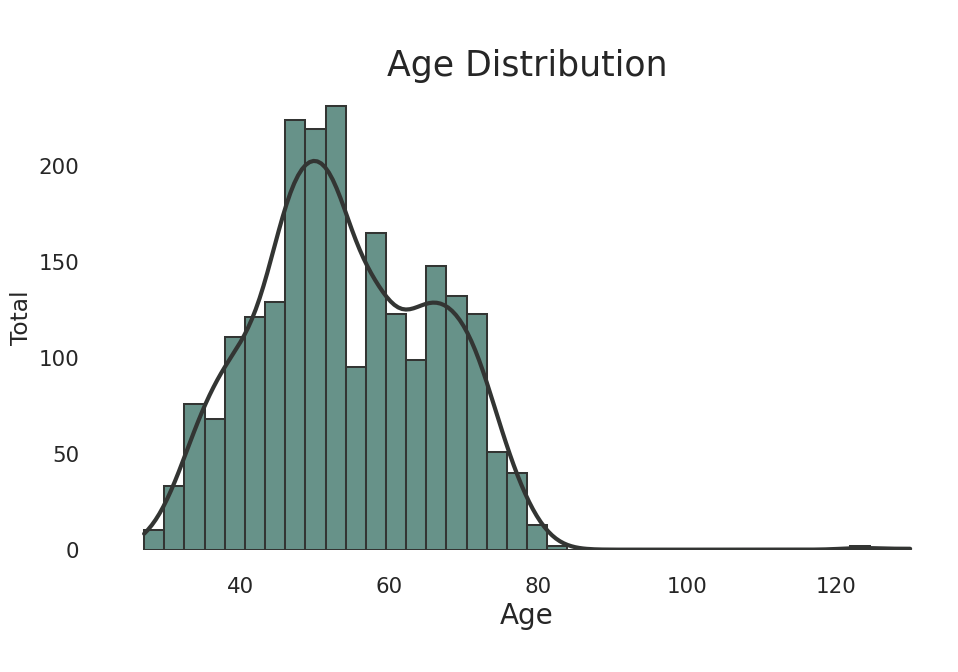

In [19]:
# Plotting Age attribute in Histogram 

fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(data['Age'], color=palette[1], kde=True, bins='auto', alpha=1, fill=True, edgecolor=palette[12])
ax.lines[0].set_color(palette[12])
ax.set_title('\nAge Distribution', fontsize=25)
ax.set_xlabel('Age\n', fontsize=20)
ax.set_ylabel('Total')


sns.despine(left=True, bottom=True)
plt.show()

- There are outliers in Age attribute as well.


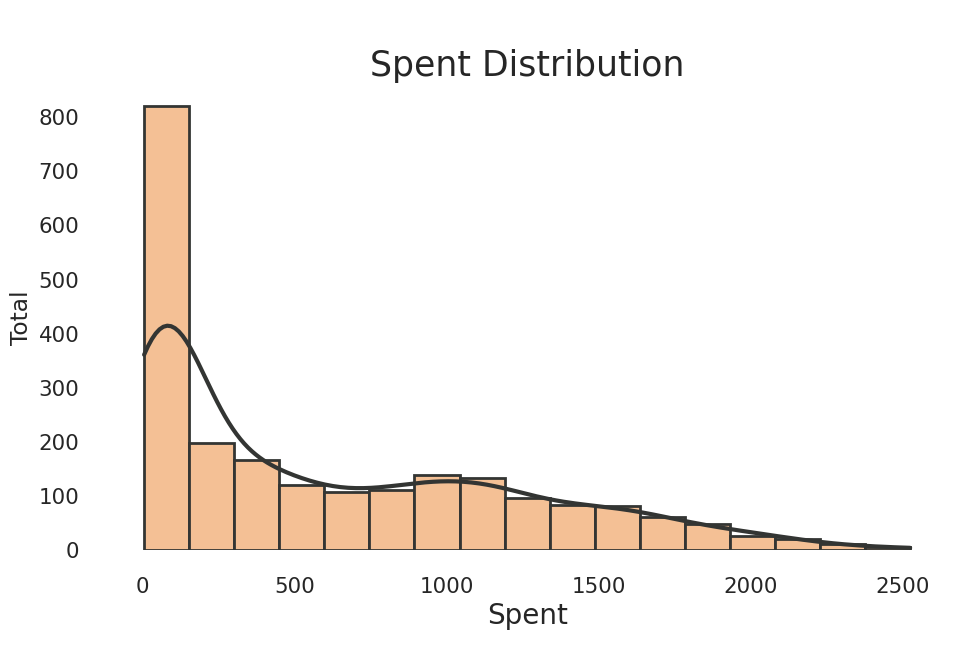

In [20]:
# Plotting Spent attribute in Histogram 

fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(data['Spent'], color=palette[2], kde=True, bins='auto', alpha=1, fill=True, edgecolor=palette[12])
ax.lines[0].set_color(palette[12])
ax.set_title('\nSpent Distribution', fontsize=25)
ax.set_xlabel('Spent\n', fontsize=20)
ax.set_ylabel('Total')


sns.despine(left=True, bottom=True)
plt.show()

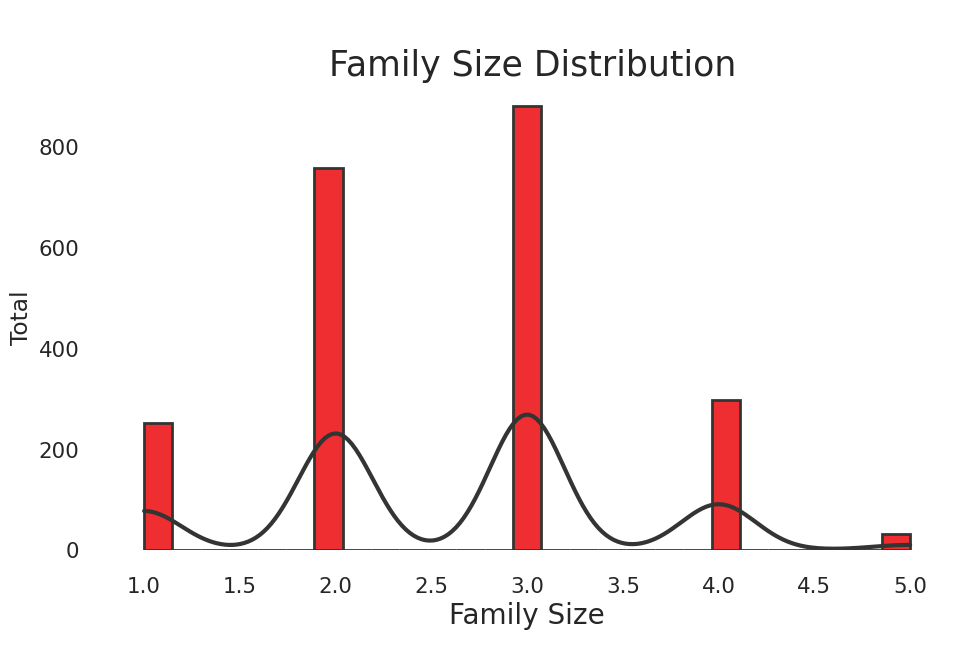

In [21]:
# Plotting Recency attribute in Histogram 

fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(data['Family_Size'], color=palette[3], kde=True, bins='auto', alpha=1, fill=True, edgecolor=palette[12])
ax.lines[0].set_color(palette[12])
ax.set_title('\n Family Size Distribution', fontsize=25)
ax.set_xlabel('Family Size\n', fontsize=20)
ax.set_ylabel('Total')


sns.despine(left=True, bottom=True)
plt.show()

- After visualizing data, There seems to be outliers in Income and Age both attributes. 
- To handle that, We have to remove data points that contains such outliers.
- We will drop the outliers by setting Cap on Age and Income attributes.


In [22]:
# Dropping outliers

data=data[(data['Age']<90)]
data=data[(data['Income']<300000)]

print('The total number of data points after dropping outliers:', len(data))

The total number of data points after dropping outliers: 2212


- Now that the outliers have been removed from the dataset, we can look into Correlation amongest the data

<Axes: >

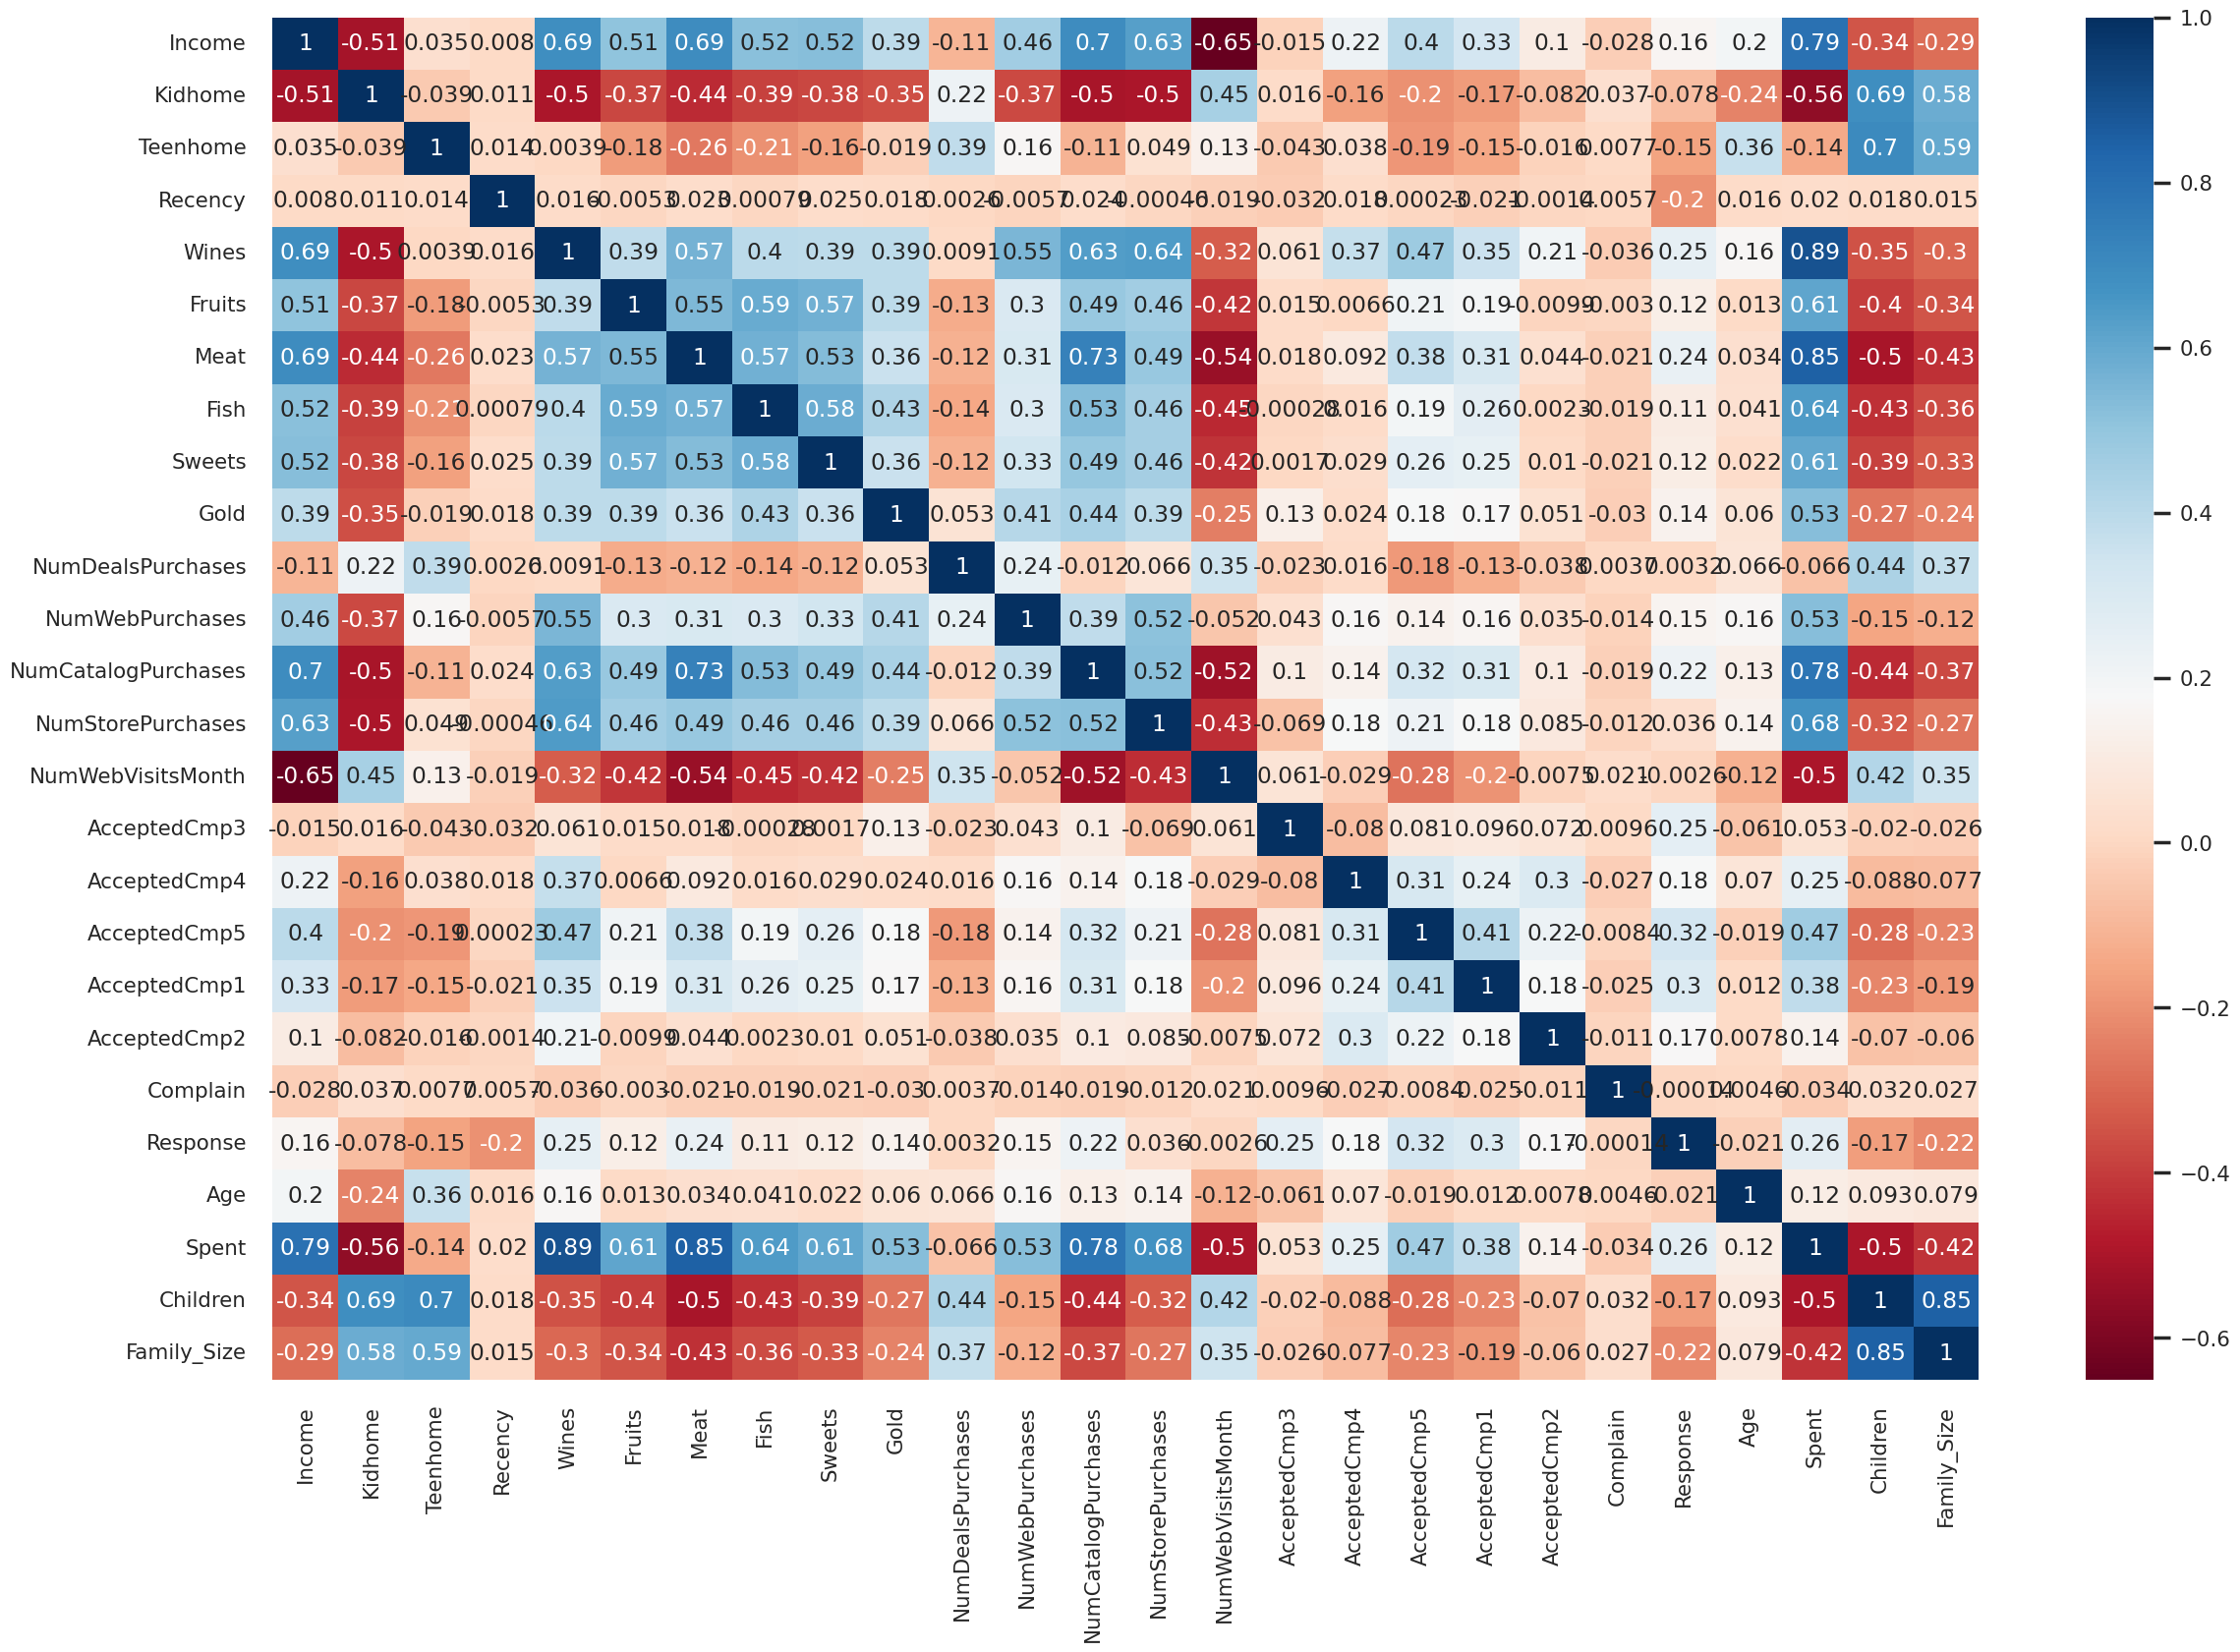

In [23]:
# Plotting Correlation Matrix

cormat=data.corr()
plt.figure(figsize=(28,18))
sns.heatmap(cormat, annot=True,cmap='RdBu')

In [24]:
# List of Categorical features

cat_cols=[col for col in data.columns if data[col].dtypes=='object']

print('Categorical features in dataset are:', cat_cols)

Categorical features in dataset are: ['Education', 'Living_With']


In [25]:
# Label Encoding Categorical features

label_encoder=LabelEncoder()
for col in cat_cols:
    data[col]=data[[col]].apply(label_encoder.fit_transform)
    
print('Categorical features are converted into Numerical features succussfully!')

Categorical features are converted into Numerical features succussfully!


In [26]:
# Creating copy of the dataset
ds=data.copy()

# We Will be removing following feature from the copied dataset
cols_to_drop=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds.drop(cols_to_drop, axis=1, inplace=True)

In [27]:
# Scaling features
scaler=StandardScaler()
scaler.fit(ds)
scaled_ds=pd.DataFrame(scaler.transform(ds),columns=ds.columns)
print('All features are now scaled!')

All features are now scaled!


In [28]:
print('Dataset to be used for model building:')

scaled_ds.head().style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

Dataset to be used for model building:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size
0,-0.868542,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359
1,-0.868542,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070
2,-0.868542,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644
3,-0.868542,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,0.740959,0.069987,0.449070
4,0.977892,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.307562,0.740959,0.069987,0.449070


# Dimensionality Reduction using PCA

- **Dimensionality Reduction** is the process of reducing attributes in the data while preventing its essential information. Its aim is to remove redudadant or irrelavant features from the data and improve effieciency.

- while **PCA** is a specific technique for accomplishing dimensionality reduction by finding new variables (principal components) that capture the most important information and patterns in the data.

In [29]:
# Using PCA to reduce dimensions aka features to 5

pca=PCA(n_components=3)
pca.fit(scaled_ds)
pca_ds=pd.DataFrame(pca.transform(scaled_ds), columns=(['col1', 'col2', 'col3']))


In [30]:
pca_ds.describe().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

,count,mean,std,min,25%,50%,75%,max
col1,2212.000000,-0.000000,2.798058,-5.873693,-2.488745,-0.746653,2.415455,7.269832
col2,2212.000000,0.000000,1.624389,-3.816025,-1.317156,-0.141667,1.161595,6.296615
col3,2212.000000,0.000000,1.154648,-3.064252,-0.892883,-0.098831,0.791543,3.731197


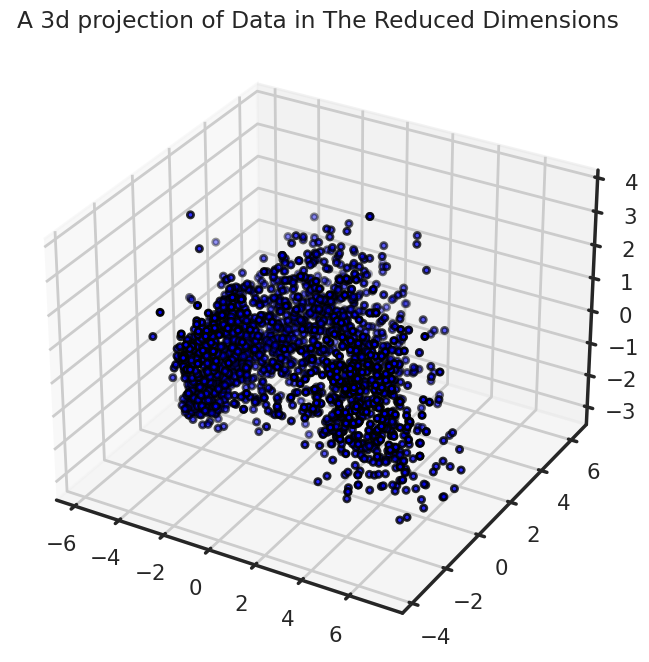

In [31]:
# A 3d projection of data in the reduced dimensions

a=pca_ds['col1']
b=pca_ds['col2']
c=pca_ds['col3']


#plot
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(a,b,c, c='blue', marker='o', edgecolor='black')
ax.set_title('A 3d projection of Data in The Reduced Dimensions')
plt.show()

# Clustering

- **Clustering** is a machine learning technique used to group similar data points together based on their characteristics or proximity. It aims to find natural groupings or clusters in the data without prior knowledge of the class labels. The goal is to discover inherent patterns or structures within the data.

- **AgglomerativeClustering** is a specific clustering algorithm, also known as hierarchical agglomerative clustering. It is a bottom-up approach where each data point starts as its own individual cluster and progressively merges with other clusters based on a similarity measure. The algorithm continues this merging process until all data points belong to a single cluster or a stopping criterion is met. AgglomerativeClustering produces a hierarchical structure of clusters, often represented as a dendrogram, which can be used to explore different levels of granularity in the clustering solution.

Elbow method to determine number of clusters to be made:


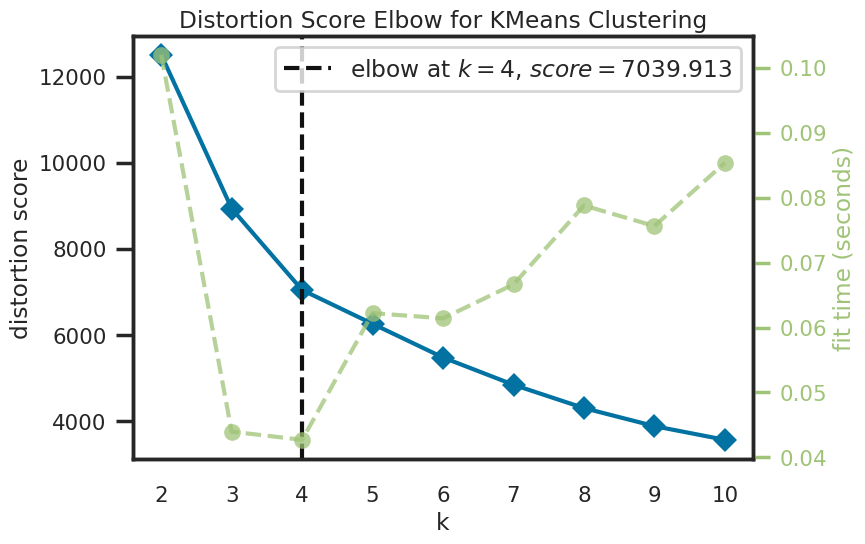

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
# Finding out number of clusters to make using elbow method

print('Elbow method to determine number of clusters to be made:')
elbow=KElbowVisualizer(KMeans(),k=10)
elbow.fit(pca_ds)
elbow.show()

- Above analysis shows that 4 clusters are the optimal number for the data.

In [33]:
# Initiating the Agglomerative Clustering model
AC=AgglomerativeClustering(n_clusters=4)

# Fitting the model and predicting clusters
yhat_AC=AC.fit_predict(pca_ds)
pca_ds['Clusters']=yhat_AC

# Adding the Clusters attribute to the original dataset
data['Clusters']=yhat_AC

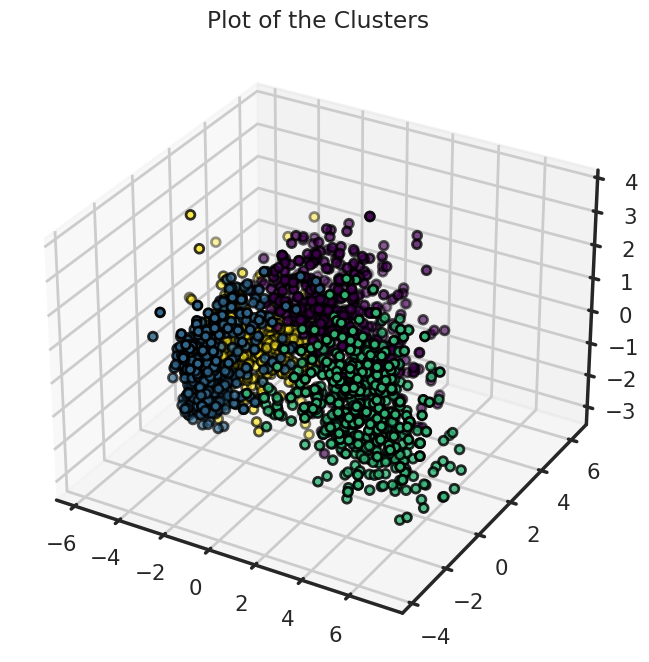

In [34]:
# Plotting the Clusters
fig=plt.figure(figsize=(12,8))
ax=plt.subplot(111, projection='3d')
ax.scatter(a,b,c, s=40, c=pca_ds['Clusters'], marker='o', edgecolor='black', cmap='viridis')
ax.set_title('Plot of the Clusters')
plt.show()


In [35]:
data['Clusters'].value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

,1,0,3,2
Clusters,586,554,543,529


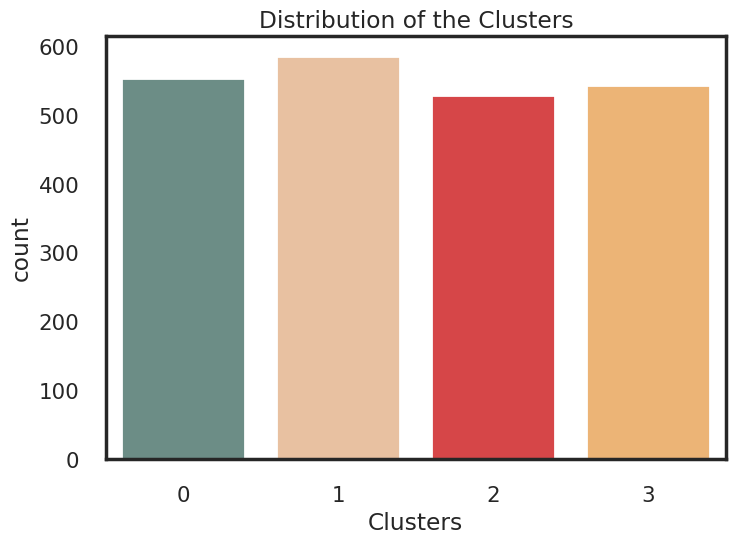

In [36]:
# Plotting countplot of Clusters
sns.countplot(x=data['Clusters'],palette=palette[1:5])
plt.title('Distribution of the Clusters')
plt.show()

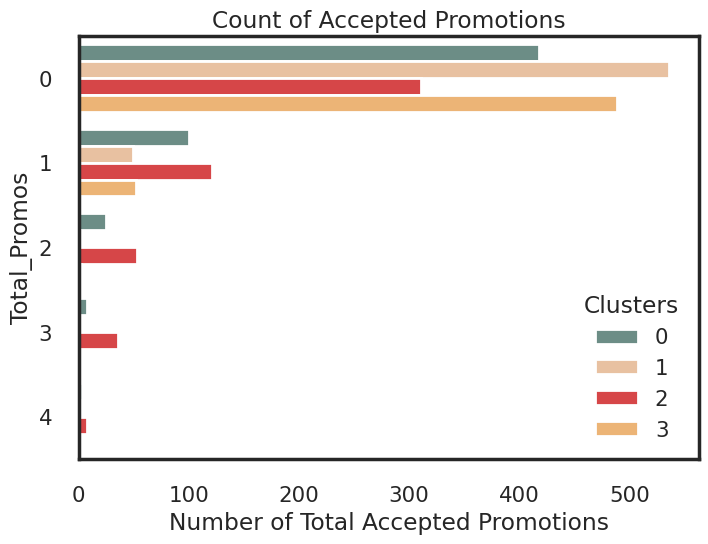

In [37]:
#Creating a attribute to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

sns.countplot(data=data, y='Total_Promos', hue='Clusters', palette=palette[1:5])
plt.title('Count of Accepted Promotions')
plt.xlabel('Number of Total Accepted Promotions')
plt.show()

- From above analysis, We can say that there isn't much response towards promotions & campaigns so far. 
- Campaings have no to very low impact on the spending patterns of the customers

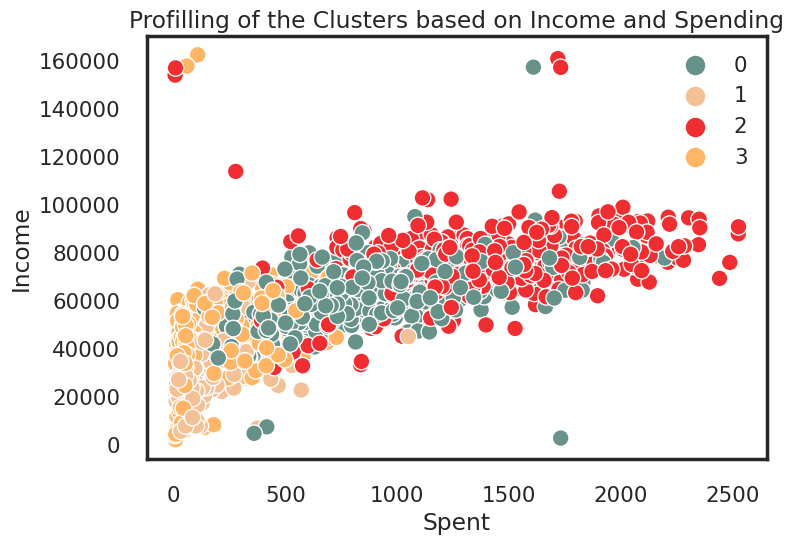

In [38]:
# Profilling culsters based on Income and Spending
sns.scatterplot(data=data, x='Spent', y='Income', hue='Clusters', palette=palette[1:5])
plt.title('Profilling of the Clusters based on Income and Spending')
plt.legend()
plt.show()

**Income vs Spending clusters patterns**

- The 4 Clusters can be described as following
1. Group0 - Medium Income and High Spending
2. Group1 - Low Income and Low Spending
3. Group2 - High Income and High Spending
4. Group3 - Low Income and Average Spending